In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

-0.6845679356606523 0.6032931828433219


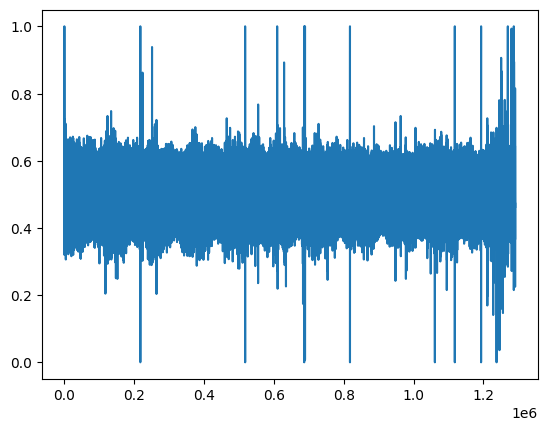

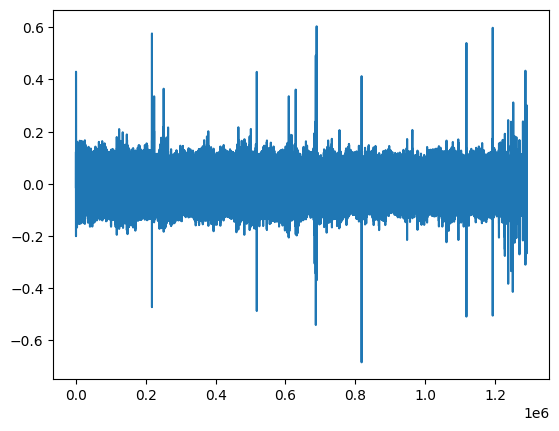

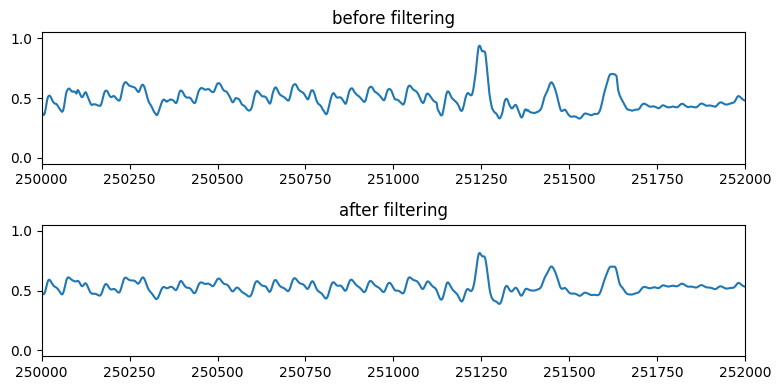

(775250, 1)


In [3]:
def butterworth(sig,N=4,btype='bandpass',Wn=[0.5,8],fs=125):
    sos = signal.butter(N,Wn,btype,fs=fs,output='sos')
    return signal.sosfiltfilt(sos,sig)

def hampel(sig,k=3,nsigma=3):
    sig -= sig.mean()
    median = signal.medfilt(sig,kernel_size=k)
    deviation = np.abs(sig-median)
    median_deviation = signal.medfilt(deviation,kernel_size=k)
    threshold = 1.4826 * nsigma*median_deviation
    outliers = np.where(deviation > threshold)[0]
    sig[outliers] = median[outliers]
    return sig
    
def minmax_norm(sig):
    print(np.nanmin(sig),np.nanmax(sig))
    return (sig-np.nanmin(sig))/(np.nanmax(sig)-np.nanmin(sig))
# def zscore_norm(sig):
def filter_ppg(sig):
    plt.figure()
    plt.plot(sig[:,1])
    notnan= ~np.isnan(sig[:,1])
    sig[notnan,1] = butterworth(sig[notnan,1])
    plt.figure()
    plt.plot(sig[:,1])
    # sig[notnan,1] = hampel(sig[notnan,1])
    sig[:,1] = minmax_norm(sig[:,1])
    return sig

path = r"D:\minowa\BloodPressureEstimation\data\raw\ppgabp\p00\p000652\3019644_0001.npy"
xfrom = 250000
xlen = 2000

sig = np.load(path)
notnan= ~np.isnan(sig[:,1])
# sig[notnan,1] = butterworth(sig[notnan,1])
sig = filter_ppg(sig)
sig4 = np.load(path)
x = np.arange(0,len(sig))
plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.title("before filtering")
# plt.plot(x,sig_processed[:,0],label='-.',color='black')
plt.plot(x,sig4[:,1])
# plt.scatter(x[valleys_ppg], sig[valleys_ppg,0], color='red',s=24)
plt.xlim(xfrom,xfrom+xlen)
plt.subplot(2,1,2)
plt.title("after filtering")
# plt.plot(x,sig_processed[:,1],label='-.',color='black')
plt.plot(x,sig[:,1])
# plt.scatter(x[valleys_abp], sig[valleys_abp,1], color='red',s=24)
plt.xlim(xfrom,xfrom+xlen)
plt.tight_layout()
plt.show()
DATA_DIR2 = r"D:\minowa\BloodPressureEstimation\data\raw\ppgabp\p00\p000543\3047369_0024.npy"
sig3 = np.load(DATA_DIR2)
print(sig3.shape)

In [4]:
sos = signal.butter(N=4,Wn=[0.5,8],btype='bandpass',fs=125,output='sos')
w, h = signal.sosfreqz(sos, worN=1500)

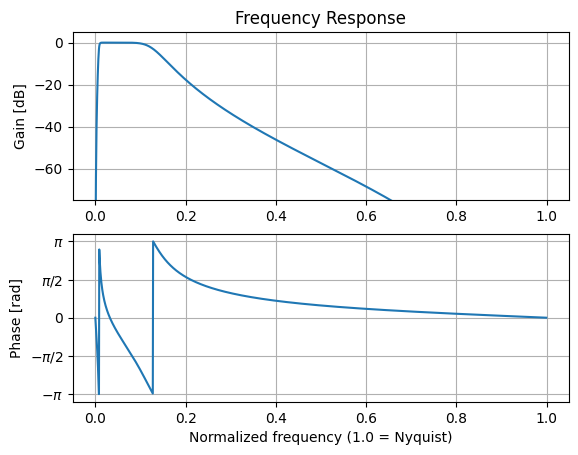

In [5]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w/np.pi, db)
plt.ylim(-75, 5)
plt.grid(True)
plt.yticks([0, -20, -40, -60])
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, np.angle(h))
plt.grid(True)
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.xlabel('Normalized frequency (1.0 = Nyquist)')
plt.show()

In [ ]:
plt.subplot(2, 1, 1)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w/np.pi, db)
plt.xim(7.9,9.1)
plt.ylim(-75, 5)
plt.grid(True)
plt.yticks([0, -20, -40, -60])
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')
plt.subplot(2, 1, 2)
plt.xim(7.9,9.1)
plt.plot(w/np.pi, np.angle(h))
plt.grid(True)
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.xlabel('Normalized frequency (1.0 = Nyquist)')
plt.show()